project contains Hierarchical clustering of the data

Objective: to identify the number of iris species in the data set

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

In [2]:
raw_data = pd.read_csv('IrisCategorical.csv')
raw_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Attributes for clustering:

Petal:
1. PetalLengthCm
2. PetalWidthCm

Sepal:
1. SepalLengthCm
2. SepalWidthCm



Removing the Id and Species attributes, for clustering. 

Separating attributes with Sepal and Petal from each other.

In [3]:
data_sepal = raw_data.drop(['Id','Species'],axis=1)
data_sepal = data_sepal.drop(['PetalLengthCm','PetalWidthCm'],axis=1)

data_petal = raw_data.drop(['Id','Species'],axis=1)
data_petal = data_petal.drop(['SepalLengthCm','SepalWidthCm'],axis=1)

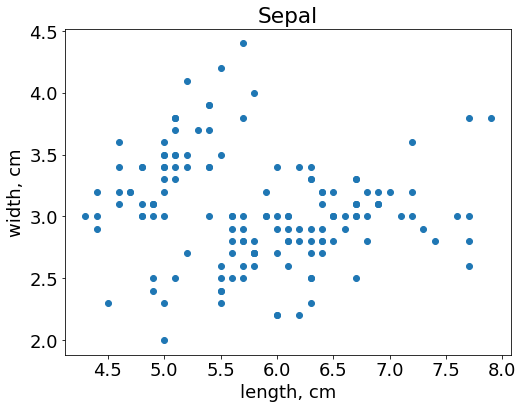

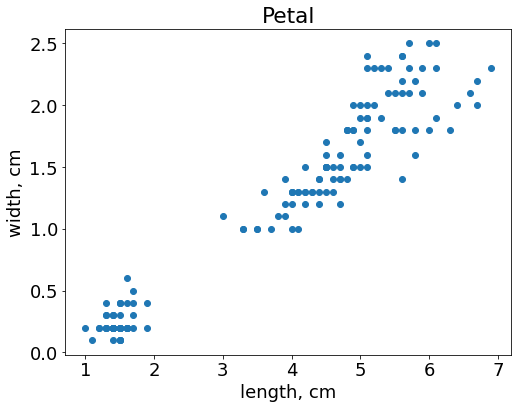

In [4]:
# Visualization of sets of points
def visual(iris_df, name):
    plt.figure(figsize = (8,6));
    font = {'family': 'sans','size':18}
    plt.rc('font',**font)
    plt.scatter(iris_df[f"{name}LengthCm"],iris_df[f"{name}WidthCm"], cmap=plt.get_cmap('Pastel1'))
    plt.ylabel('width, cm')
    plt.xlabel('length, cm')
    plt.title(name)

visual(data_sepal, 'Sepal')
visual(data_petal, 'Petal')

In [5]:
# Functions for building dendrograms and tracking n unions
def generate_dendrogram(iris_db):
    return [linkage(iris_db,'single'), linkage(iris_db,'complete')]

def show_dendrogram(z):
    plt.figure(figsize = (25,10))
    font = {'family': 'sans','size':18}
    plt.rc('font',**font)
    plt.title(f"Dendogram")
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(z,
        leaf_rotation = 90.,
        leaf_font_size = 8.,
    )
    plt.show()

def show_last(z, count_last):
    plt.title('Hierarchical Clustering Dendrogram')
    font = {'family': 'sans','size':18}
    plt.rc('font',**font)
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        z,
        truncate_mode = 'lastp',
        p = count_last,
        show_leaf_counts = False,
        leaf_rotation = 90.,
        leaf_font_size = 8.,
        show_contracted = True,
    )
    plt.show()

In [6]:
# Function for calculating criteria for knee-elbow analysis
def show_result(k_values, wss_values, bss_values):
    fig = plt.figure()
    font = {'family': 'sans','size':12}
    plt.rc('font',**font)
    plt.plot(k_values, wss_values, 'bo-', label = 'WSS', color = 'red')
    plt.plot(k_values, bss_values, 'bo-', label = 'BSS', color = 'blue')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('BSS & WSS')
    plt.xticks(k_values)
    plt.legend()
    plt.title('Hierarchical Clustering')

def knee_elbow_analysis(iris_df, z, int_range):
    wss_values = []
    bss_values = []
    k_values = range(1,int_range)
    
    for k in k_values:
        clustering = fcluster(z, k, criterion = 'maxclust')
        centroids = [np.mean(iris_df[clustering == c], axis=0)for c in range(1,k+1)]
        cdist(iris_df,centroids,'euclidean')
        D = cdist(iris_df,centroids,'euclidean')
        cIdx = np.argmin(D,axis=1)
        d = np.min(D,axis = 1)
        avgWithinSS = sum(d)/iris_df.shape[0]
        wss = sum(d**2)
        tss = sum(pdist(iris_df)**2)/iris_df.shape[0]
        bss = tss-wss
        wss_values +=[wss]
        bss_values +=[bss]
        
    show_result(k_values, wss_values, bss_values)


In [7]:
# Generalizing visualization function and knee-elbow analysis
def get_dendrogram(iris_df):
    print('Illustrate dendrograms with single- and complete-lincage')
    dendrograms =generate_dendrogram(iris_df)
    for dendrogram in dendrograms:
        print('Illustrate dendrogram')
        show_dendrogram(dendrogram)
        print('Exploration of last 5 lincages')
        show_last(dendrogram, 5)
        print('''To decide the number of clusters, need to find WSS and BSS criterias,
                    and do a Knee/Elbow analysis for two diagrams''')
        knee_elbow_analysis(iris_df, dendrogram, 6)
        print(' ')
    return dendrograms

Illustrate dendrograms with single- and complete-lincage
Illustrate dendrogram


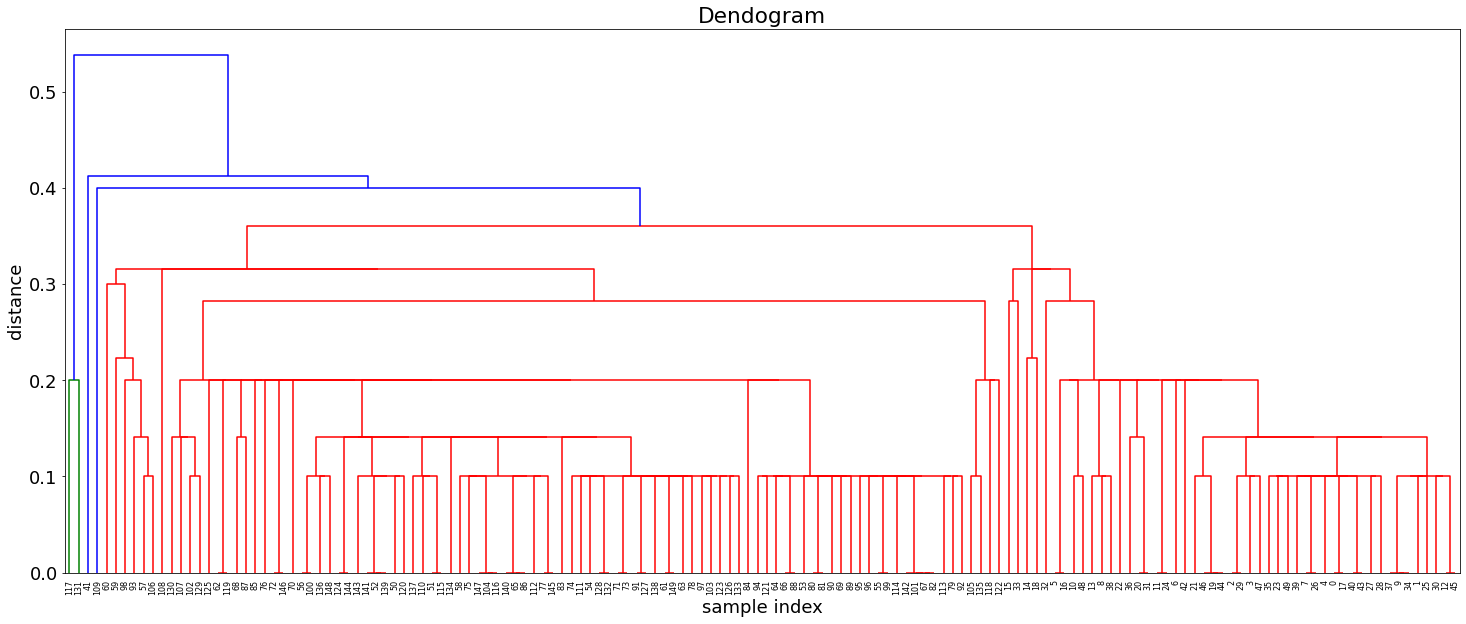

Exploration of last 5 lincages


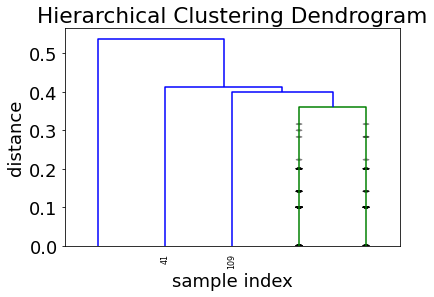

To decide the number of clusters, need to find WSS and BSS criterias,
                    and do a Knee/Elbow analysis for two diagrams
 
Illustrate dendrogram


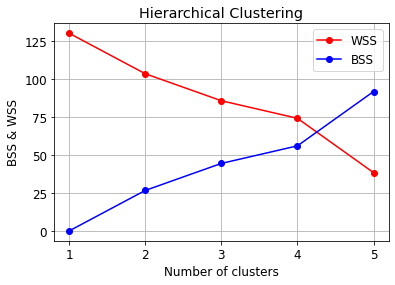

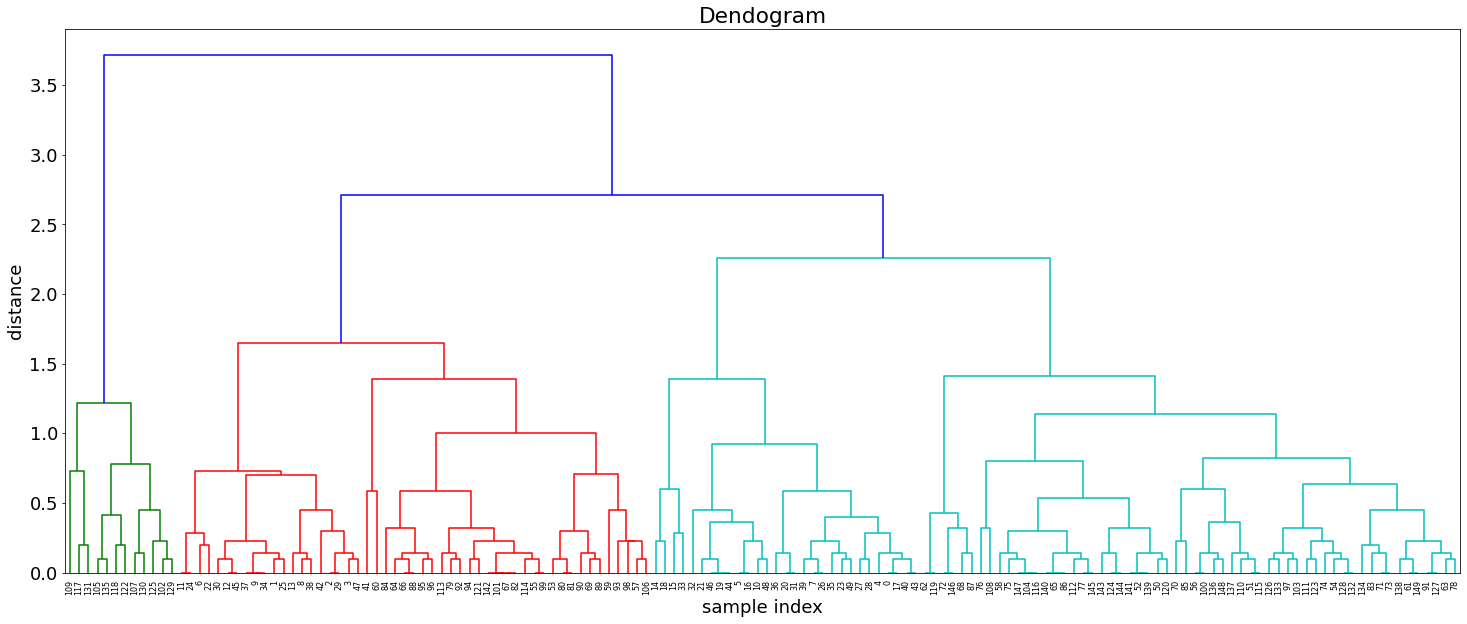

Exploration of last 5 lincages


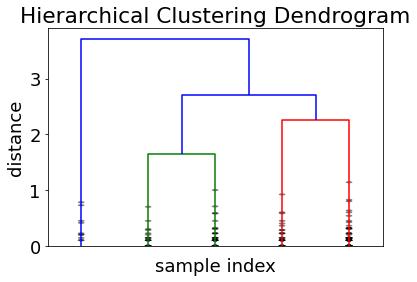

To decide the number of clusters, need to find WSS and BSS criterias,
                    and do a Knee/Elbow analysis for two diagrams
 


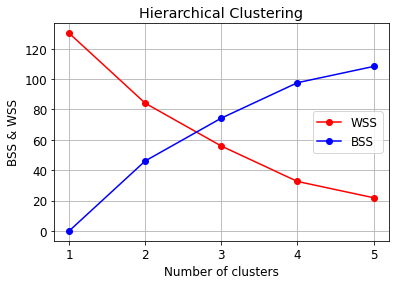

In [8]:
z_data_sepal = get_dendrogram(data_sepal)

In [9]:
# Union iteration function
def show_iteration(iris_df, name, z, range_from, range_to): 
    plt.figure(figsize=(12,12))
    for k in range(range_from,range_to):
        yp = fcluster(z,k,criterion = 'maxclust')

        plt.subplot(330+(k-1))
        plt.title('k='+str(k))
        plt.scatter(iris_df[f"{name}LengthCm"],iris_df[f"{name}WidthCm"],c=yp, cmap=plt.get_cmap('tab20b'))
    plt.tight_layout()

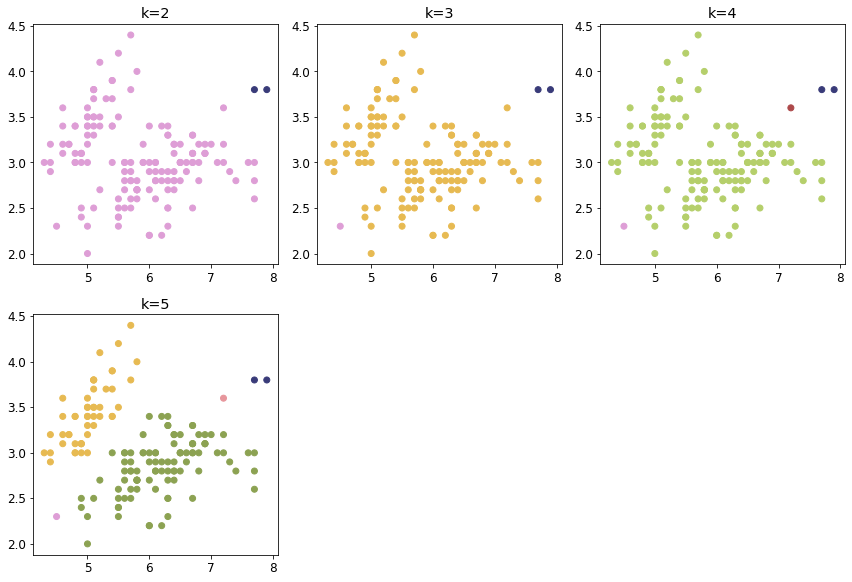

In [10]:
# Visualization of clustering of Sepal attributes

show_iteration(data_sepal, 'Sepal', z_data_sepal[0], 2, 6)

Как видно из графика полной связи, есть разница при k=2, k=3, k=4 кластерах 

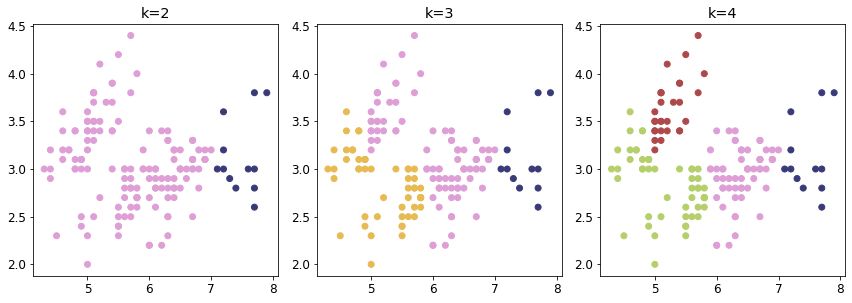

In [11]:
show_iteration(data_sepal, 'Sepal', z_data_sepal[1], 2, 5)

Sepal Attribute Outputs:

When using the single link method, 1 cluster and outliers can be observed from the graphs. 

Knee/elbow analysis showed 2-5 clusters, but at 5 large changes are observed.

When using the full coupling method, clusters without outliers are allocated. 

Knee/elbow analysis also showed 2-5 clusters.Sepal attribute clustering operation

Illustrate dendrograms with single- and complete-lincage
Illustrate dendrogram


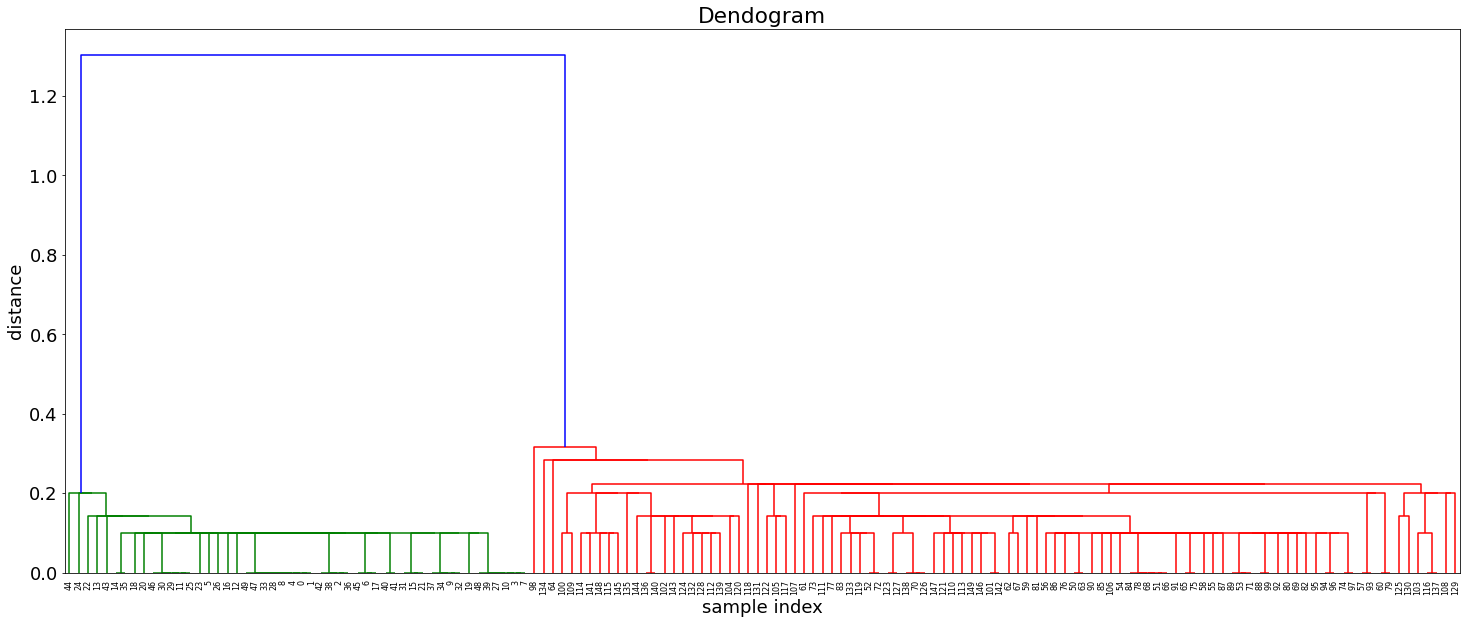

Exploration of last 5 lincages


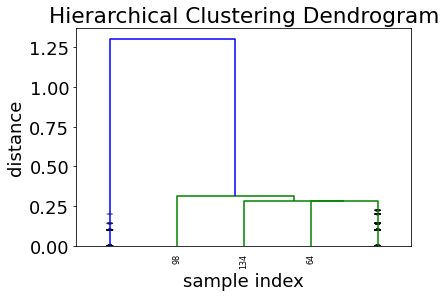

To decide the number of clusters, need to find WSS and BSS criterias,
                    and do a Knee/Elbow analysis for two diagrams
 
Illustrate dendrogram


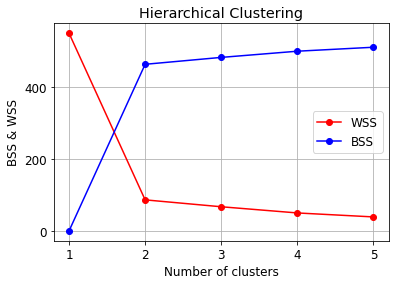

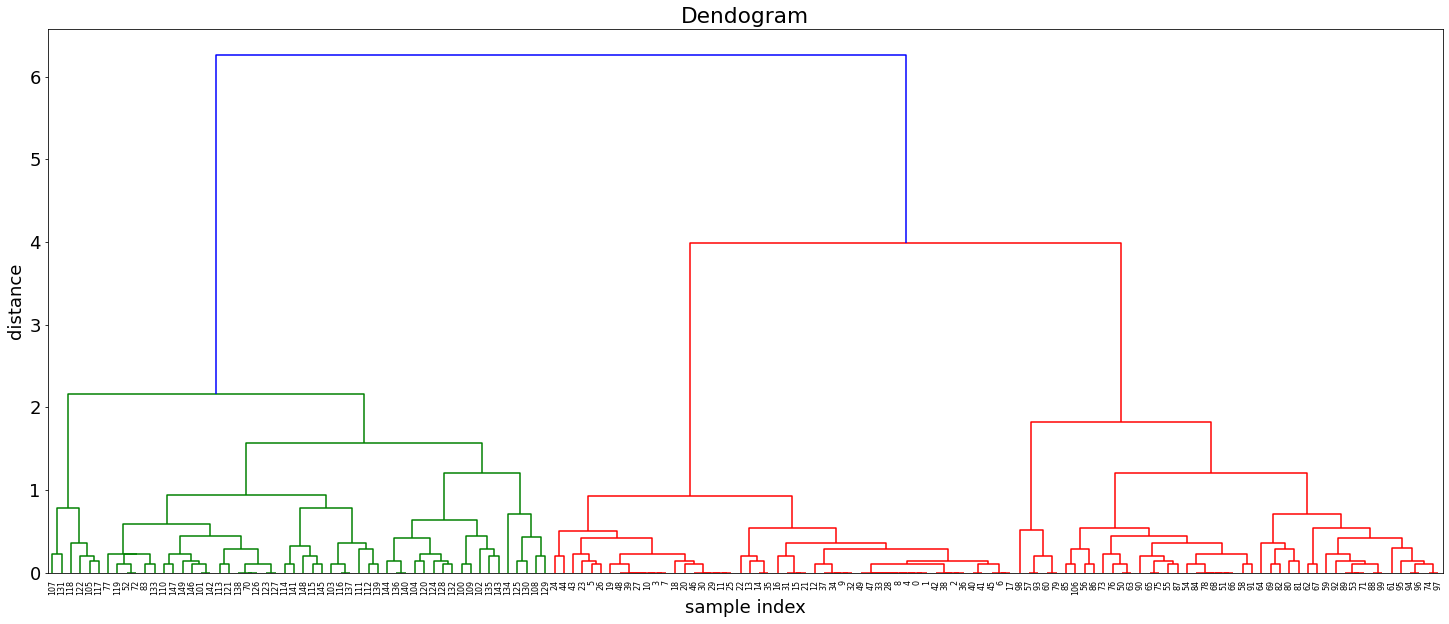

Exploration of last 5 lincages


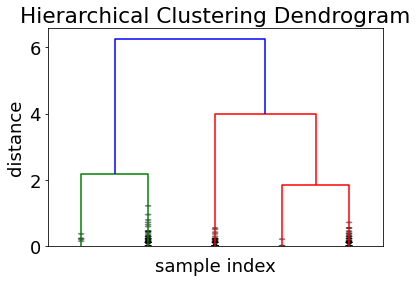

To decide the number of clusters, need to find WSS and BSS criterias,
                    and do a Knee/Elbow analysis for two diagrams
 


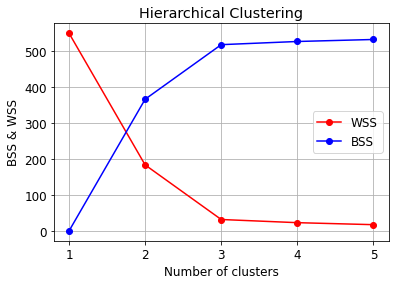

In [12]:
# Визуализация класстеризации атрибутов Petal

z_data_petal = get_dendrogram(data_petal)

As can be seen from the graphs, when using the single link method, there is a difference at k=2

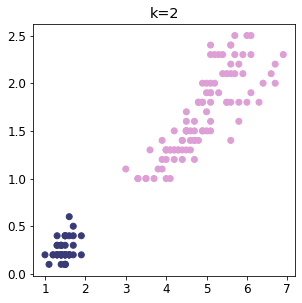

In [13]:
show_iteration(data_petal, 'Petal', z_data_petal[0], 2, 3)

Conclusions of Petal attributes:

When using the single link method, 2 clusters of different sizes can be observed from the graphs. 

Knee/elbow analysis showed 2 clusters.

When using the full link method, 3 clusters are allocated. 

Knee/elbow analysis showed 2-3 clusters.